In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [11]:
import globalETAS
import global_etas_auto
import os
import pylab as plt

data handle fetched...
 no file.
mainshock data:  {'lat': -37.207799999999999, 'mag': 5.7999999999999998, 'event_date': numpy.datetime64('2016-08-31T17:04:35.150000-0500'), 'depth': 22.399999999999999, 'event_date_float': 736207.91985127318, 'lon': 179.1249} 6.90192132301 0.248025202516 0.311414337291
data handle fetched...
 no file.
biggest event(s):  [(datetime.datetime(2016, 8, 31, 22, 4, 35, 150000), -37.2078, 179.1249, 5.8, 22.4, 736207.9198512732)]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-09-03 23:14:27.134399+00:00
fetch and process catalog.
etas_prams:  {'q': 1.5, 'b2': 1.5, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2016, 9, 1, 23, 14, 27, 134399, tzinfo=<UTC>)], 'lons': [178.81348566270896, 179.43631433729104], 'fit_factor': 2.0, 'mc': 2.5, 'lats': [-37.455825202516017, -36.959774797483981], 'd_tau': 2.28, 'd_lambda': 1.76, 'do_recarray': True, 'incat

/home/myoder/Documents/Research/Yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof
/home/myoder/Documents/Research/Yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof
/home/myoder/Documents/Research/Yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof
/home/myoder/Documents/Research/Yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof
/home/myoder/Documents/Research/Yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(lis

R:  <multiprocessing.pool.ApplyResult object at 0x7f2b3c0d27b8>
R:  <multiprocessing.pool.ApplyResult object at 0x7f2b3c0d2978>
R:  <multiprocessing.pool.ApplyResult object at 0x7f2b3c0df898>
R:  <multiprocessing.pool.ApplyResult object at 0x7f2b3c13e748>
R:  <multiprocessing.pool.ApplyResult object at 0x7f2b3c0ae7f0>
R:  <multiprocessing.pool.ApplyResult object at 0x7f2b3c0aecc0>
R:  <multiprocessing.pool.ApplyResult object at 0x7f2b3c1ad9e8>
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 35], None)
make_etas():
etas_mpp worker xyz_range:  [0, 5]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-09-03 23:14:30.621879+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 35], [0, 5])
etas_mpp worker xyz_range:  [5, 10]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-09-03 23:14:30.622457+00:00
ET

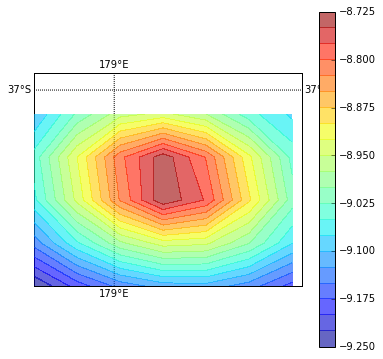

In [13]:
etas = global_etas_auto.auto_etas(dt_0=6, lon_center=179.055, lat_center=-37.401, d_lat_0=3., d_lon_0=3., fnameroot='etas_auto_global_2016_09_01',
                                  kmldir='/home/myoder/Dropbox/Research/etas/etas_auto_2016_09_01')

etas.make_etas_contour_map(fignum=0, n_contours=25)

kml bottom, top:  0 26


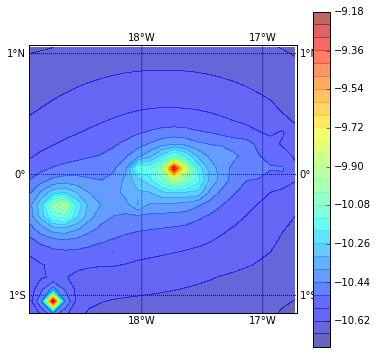

In [10]:


out_path = '/home/myoder/Dropbox/Research/etas/new_zealand_2016'
out_fname = 'new_zealand_2016'
if not os.path.isdir(out_path): os.makedirs(out_path)

etas.export_kml(os.path.join(out_path, '{}.kml'.format(out_fname)))
etas.export_xyz(os.path.join(out_path, '{}.xyz'.format(out_fname)))
plt.savefig((os.path.join(out_path, '{}.png'.format(out_fname))))